# Density Based Clustering: DBSCAN

One issue with K-means clustering is that it assumes that all directions are equally important for each cluster. This is usually not a big problem, unless we come across with some oddly shape data. In this lesson we will take a look at another clustering method that can help address this concern.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

### DBSCAN: 

- Stands for “Density Based Spatial Clustering of Applications with Noise”.
- Does not require the user to set the number of clusters a priori.
- Can capture clusters of complex shapes.
- Can identify points that are not part of any cluster (very useful as outliers detector).
- Is somewhat slower than agglomerative clustering and K-means, but still scales to relatively large datasets.
- Works by identifying points that are in crowded regions of the feature space, where many data points are close together (dense regions in feature space).
- Points that are within a dense region are called core samples (or core points).
- There are two parameters in DBSCAN: min_samples and eps.
- If there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample.
- Core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.

This is an example of how clustering changes according to the choosing of both parameters:

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


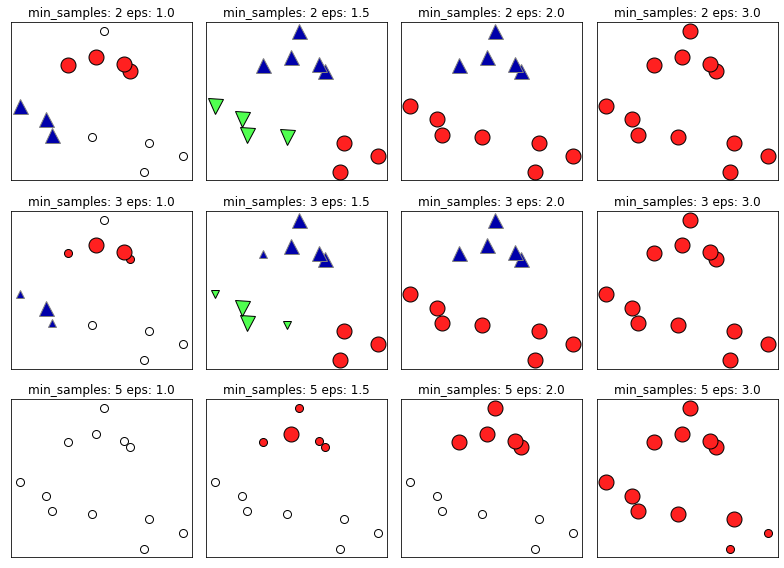

In [2]:
mglearn.plots.plot_dbscan()

In this plot, points that belong to clusters are solid, while the noise points are shown in white. Core samples are shown as large markers, while boundary points are displayed as smaller markers. Increasing eps (going from left to right in the figure) means that more points will be included in a cluster. This makes clusters grow, but might also lead to multiple clusters joining into one. Increasing `min_samples` (going from top to bottom in the figure) means that fewer points will be core points, and more points will be labeled as noise.

The parameter `eps` is somewhat more important, as it determines what it means for points to be close. Setting `eps` to be very small will mean that no points are core samples, and may lead to all points being labeled as noise. Setting `eps` to be very large will result in all points forming a single cluster.  

In [3]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans2, whiten
import random

In [4]:
# sample 

random.seed(123)
p = .01 # ~ 30,000 records

df = (pd.read_csv('data/properties_2016.csv',
                  skiprows=lambda i: i > 0 and random.random() > p)
      [['latitude','longitude', 'regionidcounty']]
      .dropna()
      .sample(5000))

In [5]:
X = df[['latitude', 'longitude']]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Try several clustering algorithms
dbscan = DBSCAN(eps=0.123, min_samples = 2)
dbscan_clusters = dbscan.fit_predict(X_scaled)

kmeans = KMeans(n_clusters=5)
kmeans_clusters = kmeans.fit_predict(X_scaled)

actual = df.regionidcounty

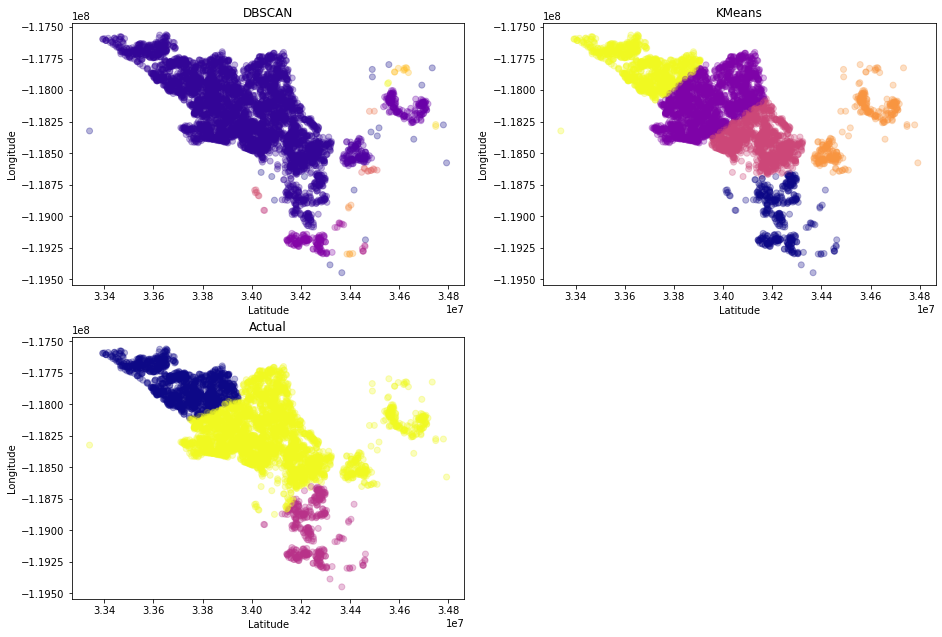

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.scatter(df.latitude, df.longitude, c=dbscan_clusters, cmap="plasma", alpha=.3)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("DBSCAN")

plt.subplot(222)
plt.scatter(df.latitude, df.longitude, c=kmeans_clusters, cmap="plasma", alpha=.3)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("KMeans")

plt.subplot(223)
plt.scatter(df.latitude, df.longitude, c=actual, cmap="plasma", alpha=.3)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Actual")

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

While DBSCAN doesn’t require setting the number of clusters explicitly, setting `eps` implicitly controls how many clusters will be found.

Finding a good setting for `eps` is sometimes easier after scaling the data, as using these scaling techniques will ensure that all features have similar ranges.

Lastly, considering we created the data points explicitly defining 5 clusters, we can mesure performance using `adjusted_rand_score`. This is not frequent since in real cases we don’t have cluster labels to begin with (thus our need to apply clustering techinques). Since in this case we do have labels, we can measure performance.

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
kmeans_clusters = KMeans().fit_predict(X_scaled)
print("KMeans ARI =", adjusted_rand_score(actual, kmeans_clusters))
#DBSCAN performance:
print("DBSCAN ARI =", adjusted_rand_score(actual, dbscan_clusters))

KMeans ARI = 0.22529420734840894
DBSCAN ARI = 0.04065128824883748


## Further Reading

https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea